In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
%matplotlib inline

In [190]:
train = pd.read_csv("/home/neosoft/Desktop/jupyter/titanicdata/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


column declaration: pclass:passenger class, sibsp:passenger siblings and spouses, parch: passenger parents and children
fare: price, cabin: cabin number, embarked:ports of embarkation(c= cherborg, q=queen stown, s=southampton)

In [191]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [192]:
numerical_data = train[['Age','SibSp','Parch','Fare']]

In [193]:
categorical_data = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [194]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [195]:
train.duplicated().sum()

0

In [196]:
train.isnull().sum().sort_values(ascending=False)
#for categorical data we use mode, numerical : mean or median(more outliers)
#single col visu.distriptive, univati:histo, bar, line, 
#numeruv vs categorical: box, bar, 
#numeric and numeric: pair plot, heat, correlation
#time series data: line plot

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [197]:
# % of missing vaues
train.isnull().sum()/train.isnull().count()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<AxesSubplot:>

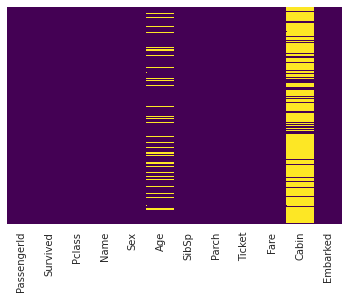

In [198]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = "viridis")
#yellow is null values

<AxesSubplot:xlabel='Survived', ylabel='count'>

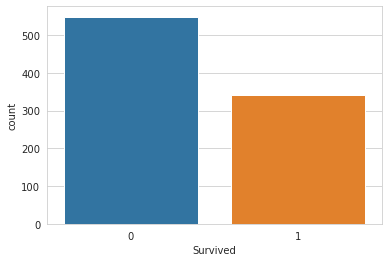

In [199]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

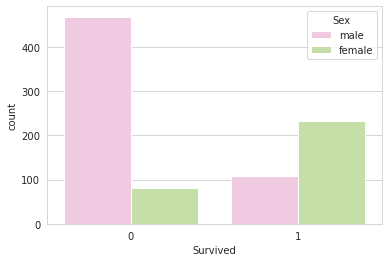

In [200]:
#survived ration in male and female
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Sex", data = train, palette="PiYG")

<AxesSubplot:xlabel='Survived', ylabel='count'>

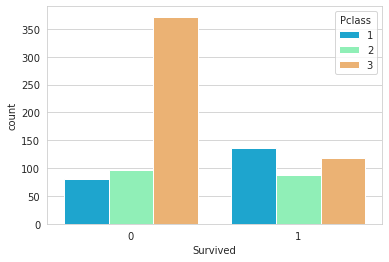

In [201]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Pclass", data= train, palette="rainbow")


<AxesSubplot:xlabel='SibSp', ylabel='count'>

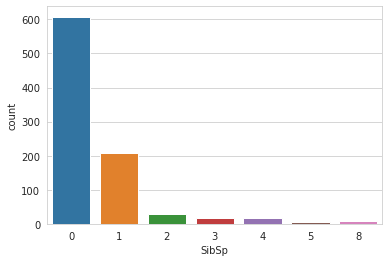

In [202]:
sns.countplot(x="SibSp", data = train)

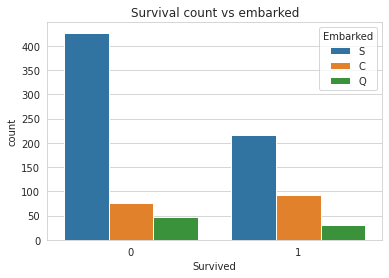

In [203]:
sns.countplot(x=train['Survived'],hue=train['Embarked'])
plt.title('Survival count vs embarked')
plt.show()

/home/neosoft/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

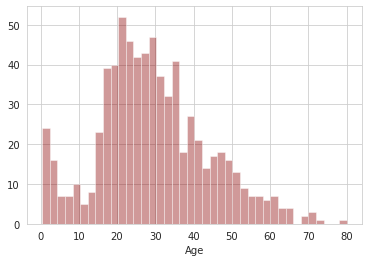

In [204]:
sns.distplot(train["Age"].dropna(), kde=False, color="darkred", bins=40) #kde :kernel distribution density

<AxesSubplot:>

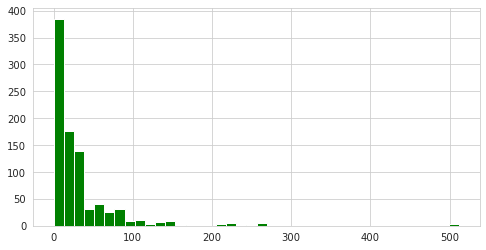

In [206]:
train["Fare"].hist(color="green", bins=40, figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

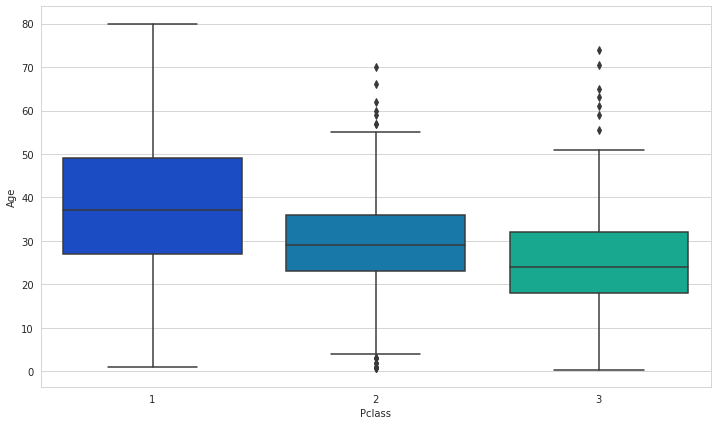

In [207]:
#to know avg age of the passenger class, belowline:25%vlaue, mid:50%avg value, abe:75%
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass", y="Age",data=train,palette="winter")

In [208]:
#compare b/w the curves for initiall and replaced mean
train["Age"] = train["Age"].fillna(train["Age"].mean())

In [209]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
train.drop(["PassengerId", "Name", "Cabin", "Ticket", "Fare", "Embarked"],axis=1, inplace=True)

In [211]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [212]:
from sklearn.preprocessing import LabelEncoder

In [213]:
label = LabelEncoder()

train["Sex"] = label.fit_transform(train["Sex"].values)

In [214]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [215]:
x=train.iloc[:,1:6]
x

,Pclass,Sex,Age,SibSp,Parch
0,3,1,22.000000,1,0
1,1,0,38.000000,1,0
2,3,0,26.000000,0,0
3,1,0,35.000000,1,0
4,3,1,35.000000,0,0
...,...,...,...,...,...
886,2,1,27.000000,0,0
887,1,0,19.000000,0,0
888,3,0,29.699118,1,2
889,1,1,26.000000,0,0


In [216]:
y=train.iloc[:, :1]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [217]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=44)

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
r_forest= RandomForestClassifier(n_estimators = 100, criterion ="entropy", random_state=0)
r_forest.fit(x_train,y_train)

<ipython-input-219-f2a464e743d6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_forest.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', random_state=0)

In [220]:
rf_score = round(r_forest.score(x_train, y_train)*100,2)
rf_score

94.06